In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_cleaned_v2.csv')

In [3]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2667,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,...,NaN,1000.0,NaN,0,1,0,0,0,0,54
2763,house,independent,sector 26,9.00,33333.0,2700.0,Plot area 300(250.84 sq.m.),5,5,2,...,NaN,2700.0,NaN,1,1,1,1,0,2,110
452,flat,adarsh nagar,sector 12,0.65,6190.0,1050.0,Carpet area: 1050 (97.55 sq.m.),3,3,1,...,NaN,NaN,1050.0,0,0,0,0,0,1,42
3644,flat,rail vihar cghs,sector 56,1.35,10384.0,1300.0,Super Built up area 1300(120.77 sq.m.)Built Up...,3,2,2,...,1300.0,1275.0,1250.0,0,0,0,0,1,0,159
3440,house,ansal florence super,sector 57,3.75,23148.0,1620.0,Plot area 180(150.5 sq.m.)Carpet area: 300 sq....,3,4,3,...,NaN,NaN,300.0,1,1,1,0,0,1,38


**(1) Check the shape**

In [4]:
df.shape

(3803, 23)

**(2) Check Info**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

**(3) Check Duplicated**

In [6]:
df.duplicated().sum()

np.int64(126)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

# Property type
**(1) 76.6% flats & rest of the houses**  
**(2) No Missing Values**

<Axes: xlabel='property_type'>

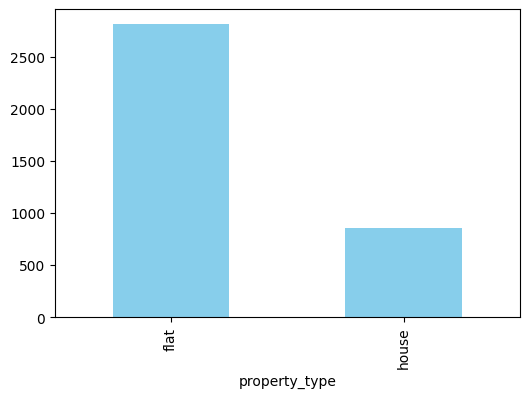

In [9]:
df['property_type'].value_counts().plot(kind='bar', figsize=(6, 4), color='skyblue')

<Axes: ylabel='count'>

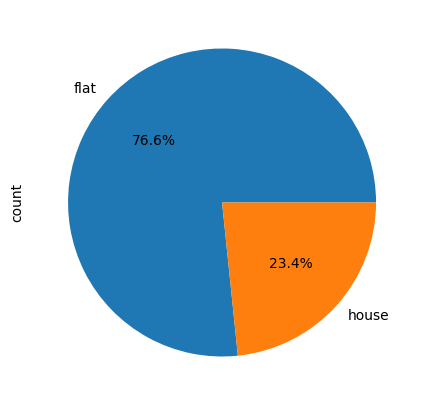

In [10]:
df['property_type'].value_counts().plot(kind='pie', figsize=(10, 5), autopct='%1.1f%%')

In [11]:
df['property_type'].isnull().sum()

np.int64(0)

# Society 
(1) There are 676 societies.  
    75 of societies cover almost 50% of the data   

(2) **612** or **13%** rows were independent.

(3) 1 society contains 308 flats/houses  
    Between 1 and 10 societies contain **273** flats/houses  
    Between 10 and 50 societies contain **86** flat/house  
    Between 50 and 100 societies contain **2** flats/houses  
    More than 100 societies contain **1** flat/house

(4) There is one missing value  

In [12]:
df['society'].value_counts().shape

(676,)

In [13]:
df['society'].value_counts()

society
independent                             486
tulip violet                             75
ss the leaf                              73
shapoorji pallonji joyville gurugram     42
dlf new town heights                     42
                                       ... 
rail vihar cghs                           1
rk tower                                  1
antriksh green                            1
imperia elvedor                           1
m3m golf hills                            1
Name: count, Length: 676, dtype: int64

<Axes: ylabel='count'>

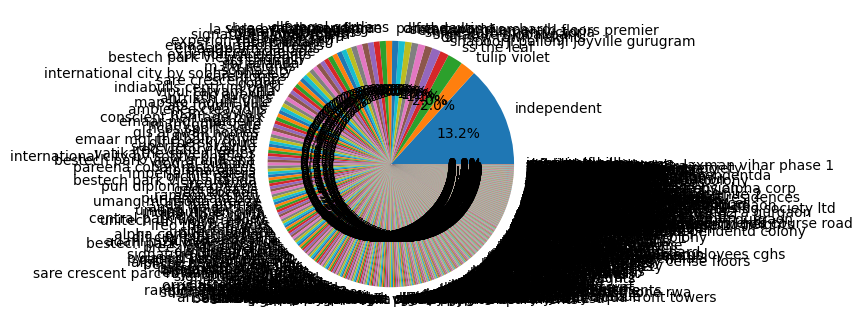

In [14]:
df['society'].value_counts().plot(kind='pie', figsize=(6, 4), autopct='%1.1f%%')

Independent don't belong to any society so we will ignore them , **612** or **13%** rows were independent.

In [15]:
df[df['society'] != 'independent'].shape

(3191, 23)

In [16]:
society_counts = df['society'].value_counts() 

frequency = {'More than 100': (society_counts > 100).sum(),
             'Between 50 and 100': ((society_counts > 50) & (society_counts < 100)).sum(),
             'Between 10 and 50': ((society_counts < 50) & (society_counts > 10)).sum(),
             'Between 1 and 10': ((society_counts < 10) & (society_counts > 1)).sum(),
             '1 society': (society_counts == 1).sum()
             }

frequency

{'More than 100': np.int64(1),
 'Between 50 and 100': np.int64(2),
 'Between 10 and 50': np.int64(86),
 'Between 1 and 10': np.int64(273),
 '1 society': np.int64(308)}

WE can use this code to check how many rows are in each counts

In [17]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023511
ss the leaf                             0.046395
shapoorji pallonji joyville gurugram    0.059561
dlf new town heights                    0.072727
signature global park                   0.083699
                                          ...   
ramsons kshitij                         0.490282
ats kocoon                              0.494357
ansal heights 86                        0.498433
ireo the corridors                      0.502194
mvn athens                              0.505956
Name: proportion, Length: 75, dtype: float64

Now we have normalized the value_coun() cumsum() to see the cumulative percentage of top 75 societies.  
75 of societies cover almost 50% of the data

<Axes: xlabel='society'>

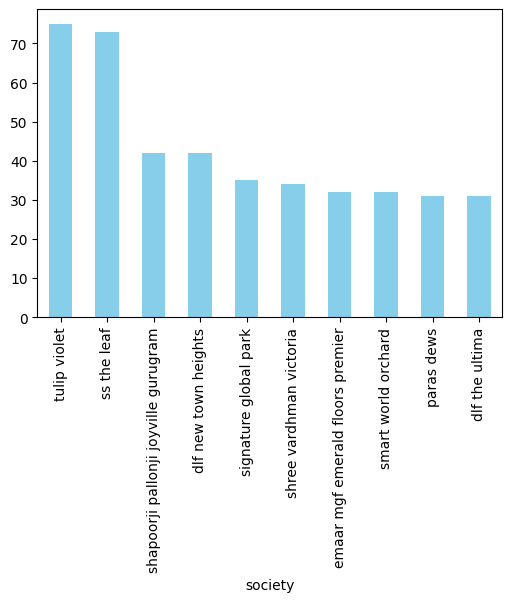

In [18]:
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar', figsize=(6, 4), color='skyblue')

<Axes: ylabel='count'>

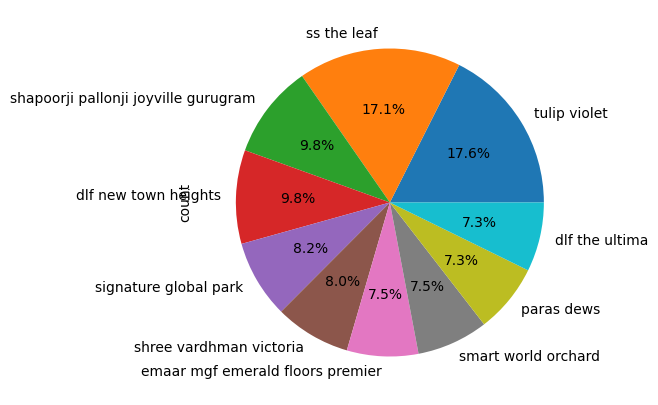

In [19]:
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='pie', figsize=(10, 5),autopct='%1.1f%%')

In [20]:
df['society'].isnull().sum()

np.int64(1)

# Sector
(1) There are 104 sectors  
     25 of sectors cover almost 50% of data  

(2) More than 100 properties are found in 3 sectors    
    Between 50 and 100 properties are found in 25 sectors  
    Between 10 and 50 properties are found in 60 sectors  
    Between 1 and 10 properties are found in 16 sectors  
    0 sector contains 1 properties  
  

In [21]:
df['sector'].value_counts().shape

(104,)

In [22]:
df['sector'].value_counts(normalize=True).cumsum().head(25)

sector
sohna road    0.045145
sector 85     0.074517
sector 102    0.103617
sector 92     0.130813
sector 69     0.156106
sector 90     0.180310
sector 65     0.203971
sector 81     0.227631
sector 109    0.251020
sector 79     0.271689
sector 104    0.290454
sector 33     0.309219
sector 83     0.327713
sector 43     0.345390
sector 50     0.362796
sector 86     0.380201
sector 37d    0.397335
sector 95     0.414196
sector 2      0.431058
sector 107    0.447376
sector 108    0.463421
sector 89     0.478923
sector 56     0.494153
sector 48     0.509111
sector 70a    0.523797
Name: proportion, dtype: float64

In [23]:
sector_counts = df['sector'].value_counts() 

frequency = {'More than 100': (sector_counts > 100).sum(),
             'Between 50 and 100': ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
             'Between 10 and 50': ((sector_counts < 50) & (sector_counts >= 10)).sum(),
             'Between 1 and 10': ((sector_counts < 10) & (sector_counts > 1)).sum(),
             '1 sector': (sector_counts == 1).sum()
             }

frequency

{'More than 100': np.int64(3),
 'Between 50 and 100': np.int64(25),
 'Between 10 and 50': np.int64(60),
 'Between 1 and 10': np.int64(16),
 '1 sector': np.int64(0)}

<Axes: ylabel='count'>

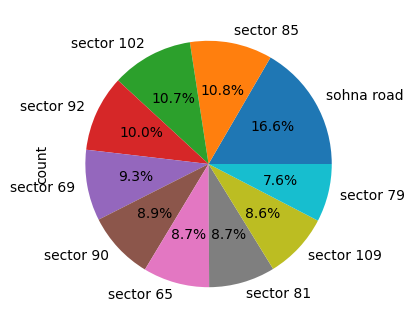

In [24]:
df['sector'].value_counts().head(10).plot(kind='pie', figsize=(6, 4),autopct ='%1.1f%%')

# Price (Target Variable)

In [25]:
df['price'].isnull().sum()

np.int64(17)

In [26]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

The std is greater then mean. It says outlier in the data.  
There is a high jump from 75% percentile to maximum value.  
So assuming the data is right skewed.

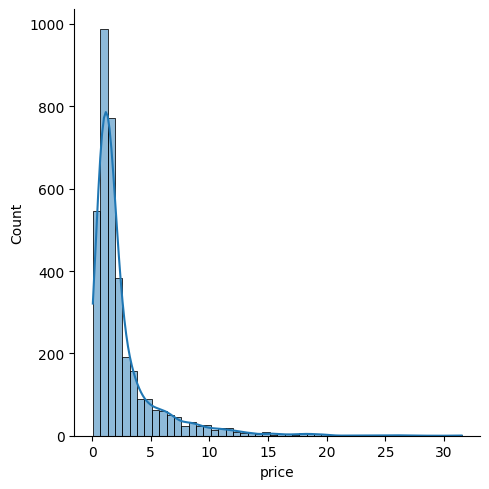

In [27]:
sns.displot(df['price'], kde=True,bins=50)

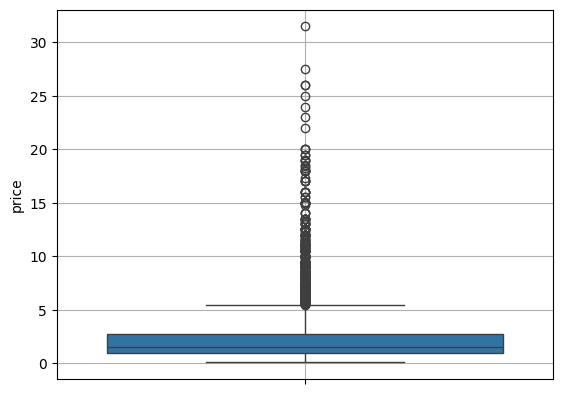

In [28]:
sns.boxplot(df['price'])
plt.grid()

Descriptive Statistics:

Count: There are 3,660 non-missing price entries.  
Mean Price: The average price is approximately 2.53 crores.  
Median Price: The median (or 50th percentile) price is 1.52 crores.  
Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.  
Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.  
IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.  

Visualizations:  

Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores),  
with a few properties going beyond 10 crores.

Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
  
Missing Values: There are 17 missing values in the price column.  

In [29]:
skewness = df['price'].skew()
kurtosis = df['price'].kurtosis()

print(skewness, kurtosis)

3.2791704733134623 14.933372629214258


Skewness: The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

Kurtosis: The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [35]:
q1 = df['price'].describe()['25%']
q3 = df['price'].describe()['75%']

IQR = q3 - q1
print(IQR)

1.8


In [39]:
lower_bound = (q1 - (1.5*IQR)).round(2)
upper_bound = q3 + (1.5*IQR)

print(lower_bound, upper_bound)

-1.75 5.45


In [45]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 23)

In [46]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

Outliers Analysis (using IQR method):

Based on the IQR method, there are 425 properties considered as outliers.
These outliers have an average price of approximately 9.24 crores.
The range for these outliers is from 5.46 crores to 31.5 crores.

<Axes: xlabel='price'>

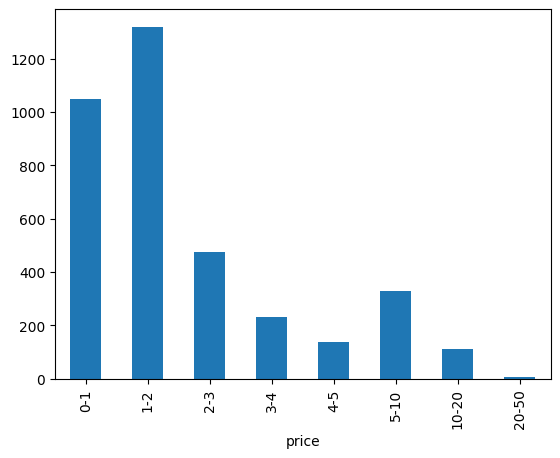

In [52]:
pd.cut(df['price'],bins=[0,1,2,3,4,5,10,20,50],labels=['0-1','1-2','2-3','3-4','4-5','5-10','10-20','20-50']).value_counts().sort_index().plot(kind='bar')

We have used binning here, This is a process to convert numerical column to categorical column.  
The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.  

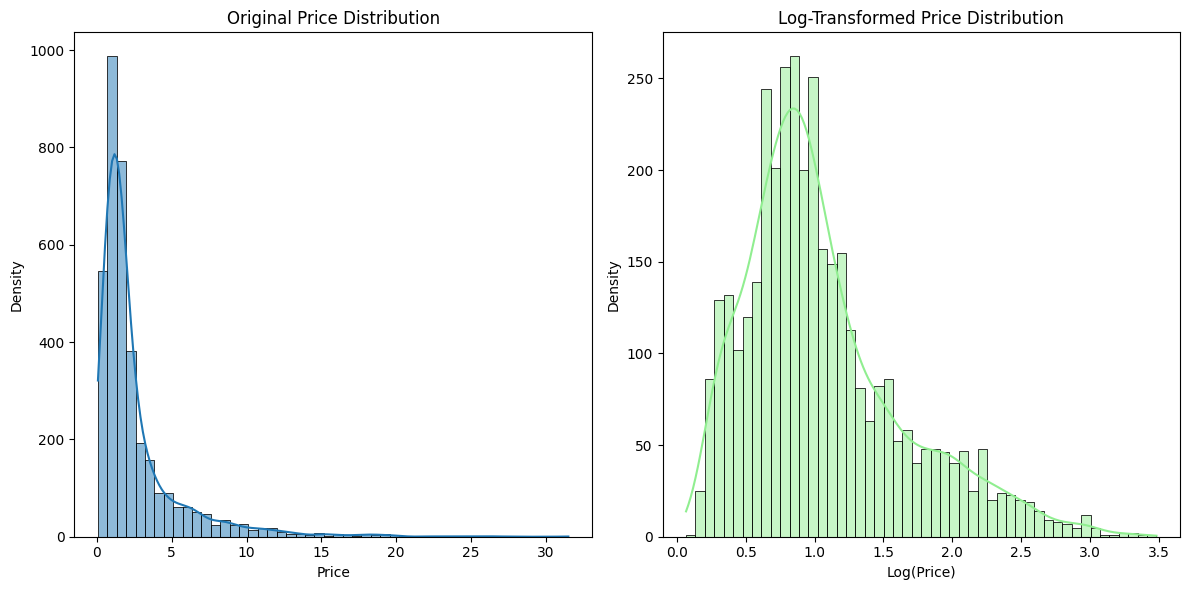

In [66]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.histplot(df['price'], kde=True,bins=50)
plt.title('Original Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')


plt.subplot(1,2,2)
sns.histplot(np.log1p(df['price']), kde=True,bins=50,color='lightgreen')
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log(Price)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

Text(0, 0.5, 'Log(Price)')

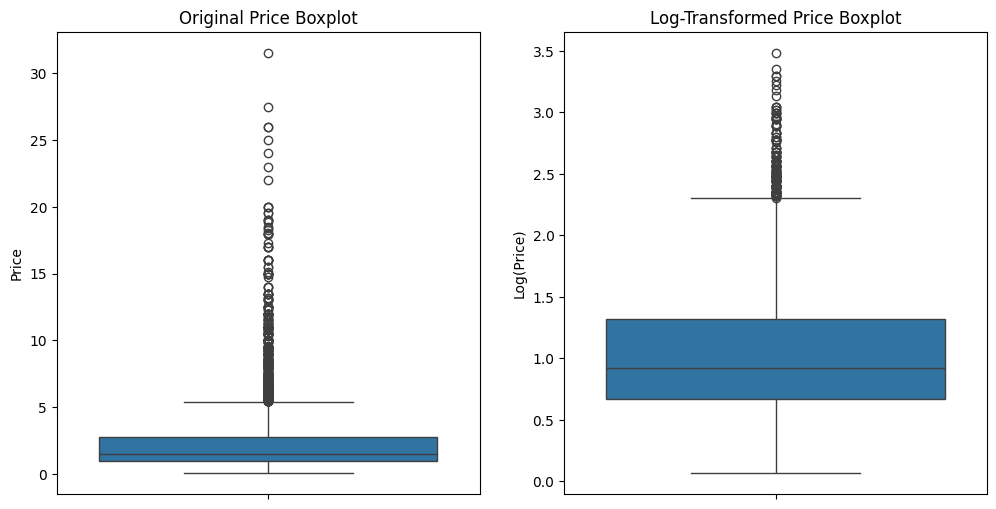

In [68]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.boxplot(df['price'])
plt.title('Original Price Boxplot')
plt.ylabel('Price')

plt.subplot(1,2,2)
sns.boxplot(np.log1p(df['price']))
plt.title('Log-Transformed Price Boxplot')
plt.ylabel('Log(Price)')


In [71]:
log_skewness = np.log1p(df['price']).skew()
log_kurtosis = np.log1p(df['price']).kurtosis()

log_skewness, log_kurtosis

(np.float64(1.0740709565255315), np.float64(0.9646692415449296))

# price_per_sqft

Potential Outliers  
Right Skewed  
17 missing values  

In [73]:
df['price_per_sqft'].isnull().sum()

np.int64(17)

In [74]:
df['price_per_sqft'].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

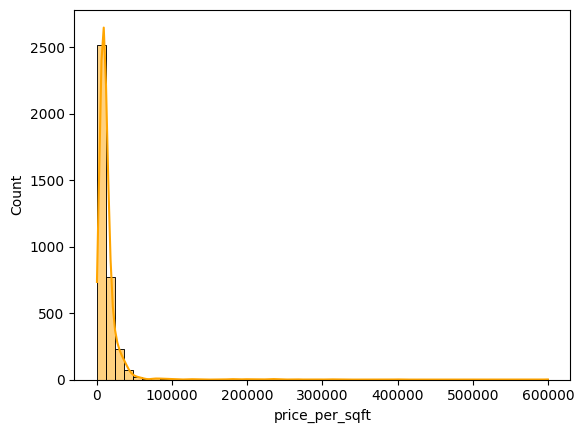

In [75]:
sns.histplot(df['price_per_sqft'], kde=True, bins=50, color='orange')

In [77]:
skewness = df['price_per_sqft'].skew()
kurtosis = df['price_per_sqft'].kurtosis()

skewness, kurtosis

(np.float64(11.4371904262371), np.float64(186.9280132353288))

<Axes: xlabel='price_per_sqft', ylabel='Count'>

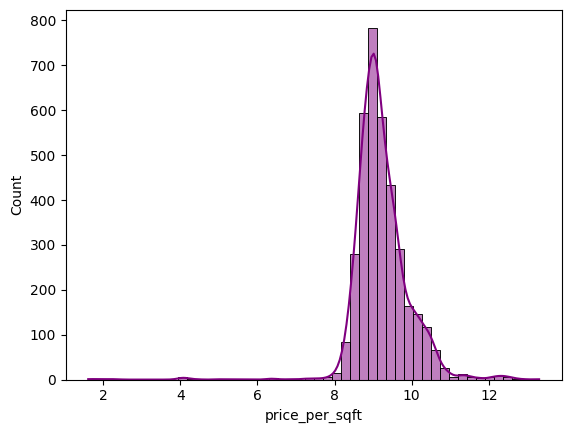

In [76]:
sns.histplot(np.log1p(df['price_per_sqft']), kde=True, bins=50, color='purple')

In [78]:
log_skewness = np.log1p(df['price_per_sqft']).skew()
log_kurtosis = np.log1p(df['price_per_sqft']).kurtosis()

log_skewness, log_kurtosis

(np.float64(-0.9498014147399654), np.float64(18.514869384549552))

<Axes: ylabel='price_per_sqft'>

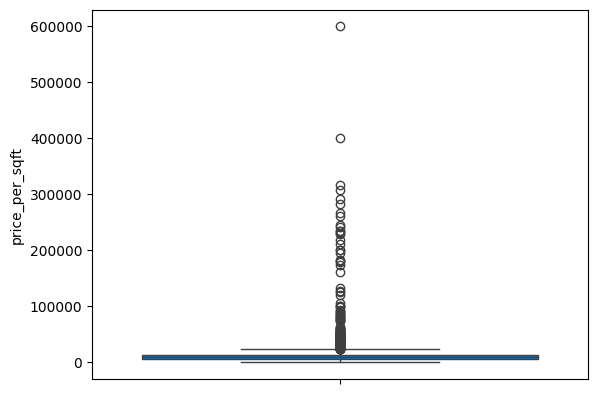

In [79]:
sns.boxplot(df['price_per_sqft'])

# bedRoom

In [82]:
df['bedRoom'].isnull().sum()

np.int64(0)

<Axes: xlabel='bedRoom'>

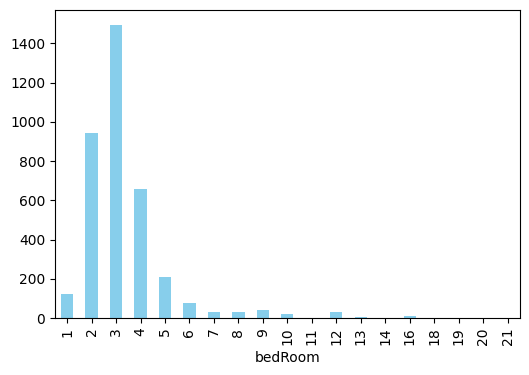

In [85]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar', figsize=(6, 4), color='skyblue')

<Axes: ylabel='count'>

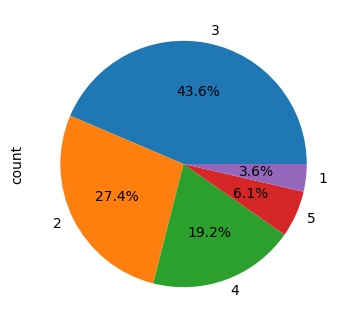

In [89]:
df['bedRoom'].value_counts().head().plot(kind='pie', figsize=(6, 4),autopct='%1.1f%%')

# bathroom

In [90]:
df['bathroom'].isnull().sum()   

np.int64(0)

In [94]:
df['bathroom'].value_counts()

bathroom
3     1077
2     1047
4      820
5      294
1      156
6      117
9       41
7       40
8       25
12      22
10       9
16       8
18       4
11       4
13       4
17       3
20       3
14       2
21       1
Name: count, dtype: int64

<Axes: xlabel='bathroom'>

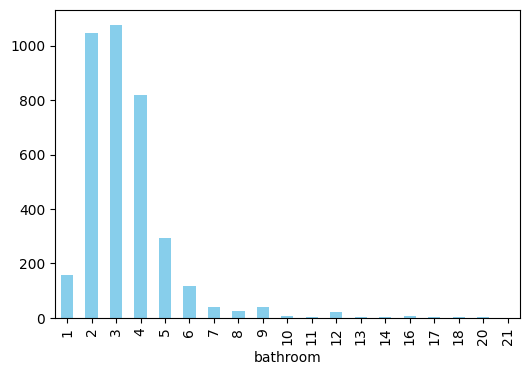

In [95]:
df['bathroom'].value_counts().sort_index().plot(kind='bar', figsize=(6, 4), color='skyblue')

<Axes: ylabel='count'>

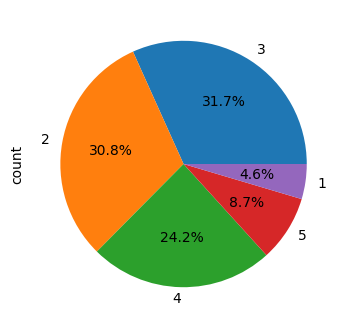

In [99]:
df['bathroom'].value_counts().head().plot(kind='pie', figsize=(6, 4), autopct='%1.1f%%')

# balcony

In [100]:
df['balcony'].isnull().sum()

np.int64(0)

<Axes: ylabel='count'>

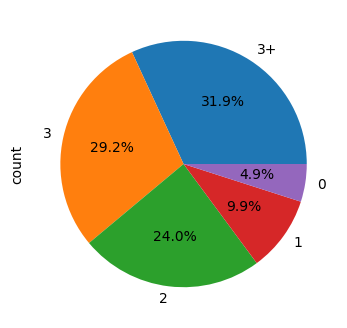

In [102]:
df['balcony'].value_counts().plot(kind='pie', figsize=(6, 4), autopct='%1.1f%%')

<Axes: xlabel='balcony'>

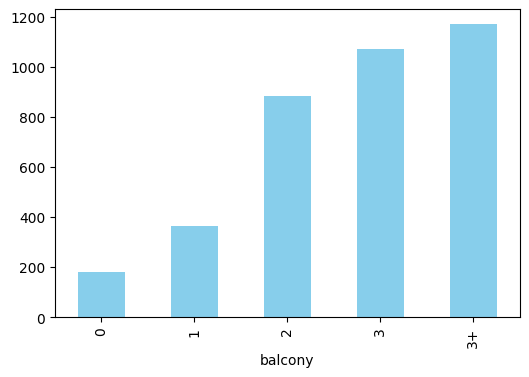

In [105]:
df['balcony'].value_counts().sort_index().plot(kind='bar', figsize=(6, 4), color='skyblue')

# floorNum

The majority of the properties lie between the ground floor (0) and the 25th floor.
Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
There are a few properties located at higher floors, but their frequency is much lower.
The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the -1 and 13th floors.
Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers **537**

In [108]:
df['floorNum'].isnull().sum()

np.int64(19)

In [117]:
df['floorNum'].value_counts().shape

(43,)

In [119]:
df['floorNum'].describe()

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum', ylabel='Count'>

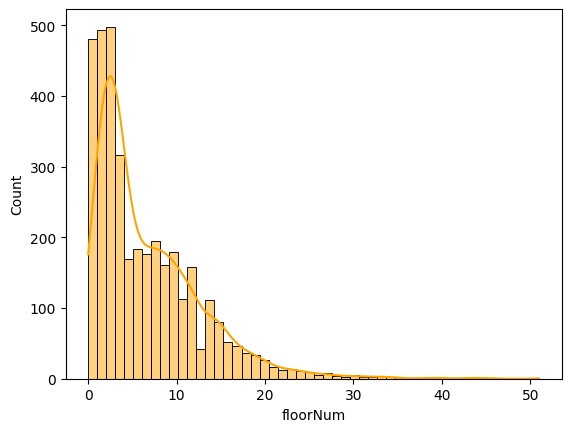

In [120]:
sns.histplot(df['floorNum'], kde=True, bins=50, color='orange')

In [122]:
skewness = df['floorNum'].skew()
kurtosis = df['floorNum'].kurtosis()

skewness, kurtosis

(np.float64(1.6936988332483094), np.float64(4.515392775153887))

<Axes: ylabel='floorNum'>

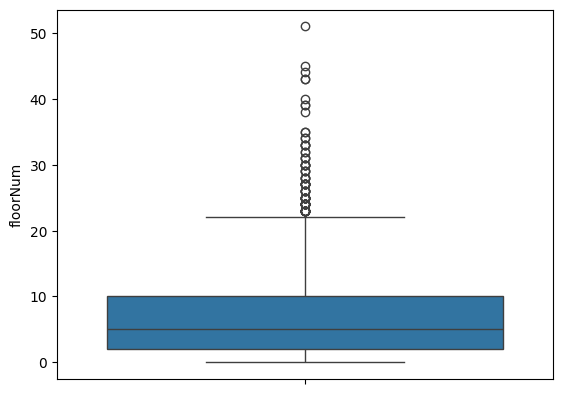

In [123]:
sns.boxplot(df['floorNum'])

In [124]:
q1 = df['floorNum'].describe()['25%']
q3 = df['floorNum'].describe()['75%']
iqr = q3 - q1
iqr

np.float64(8.0)

In [126]:
lower_bound = (q1 - 1.5 * IQR).round(2)
upper_bound = q3 + 1.5 * IQR

lower_bound, upper_bound

(np.float64(-0.7), np.float64(12.7))

In [127]:
df[(df['floorNum'] < lower_bound) | (df['floorNum'] > upper_bound)].shape

(537, 23)

# facing

In [130]:
df['facing'].isnull().sum()

np.int64(1045)

In [131]:
df['facing'].value_counts()

facing
North-East    623
East          623
North         387
West          249
South         231
North-West    193
South-East    173
South-West    153
Name: count, dtype: int64

<Axes: xlabel='facing'>

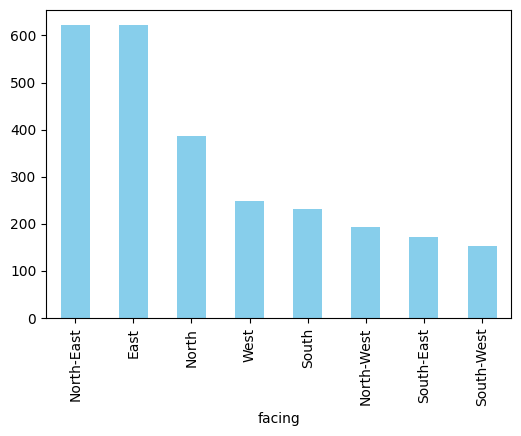

In [132]:
df['facing'].value_counts().plot(kind='bar', figsize=(6, 4), color='skyblue')

<Axes: ylabel='count'>

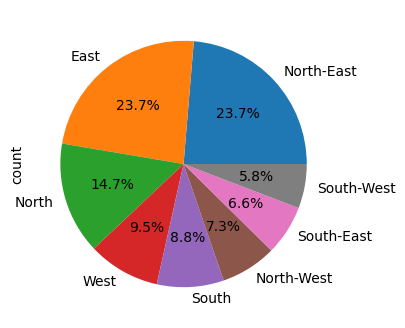

In [133]:
df['facing'].value_counts().plot(kind='pie', figsize=(6, 4), autopct='%1.1f%%')

# agePossession

In [135]:
df['agePossession'].isnull().sum()

np.int64(0)

In [136]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           593
Moderately Old         563
Undefined              306
Old Property           303
Under Construction     266
Name: count, dtype: int64

<Axes: ylabel='count'>

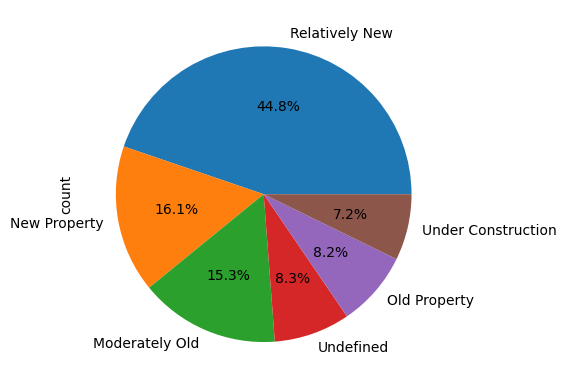

In [138]:
df['agePossession'].value_counts().plot(kind='pie',autopct='%1.1f%%')

# built_up_area

In [141]:
df['built_up_area'].isnull().sum()

np.int64(1987)

In [144]:
df['built_up_area'].describe()

count      1690.000000
mean       2379.585816
std       17942.880237
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

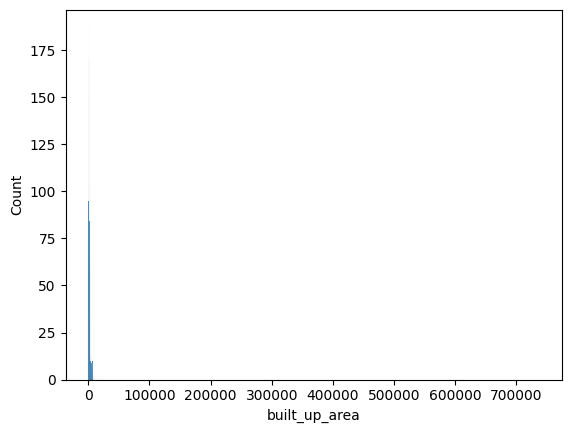

In [143]:
sns.histplot(df['built_up_area'])

#  study room, servant room, store room, pooja room, others

Text(0.5, 1.0, 'Others Room Distribution')

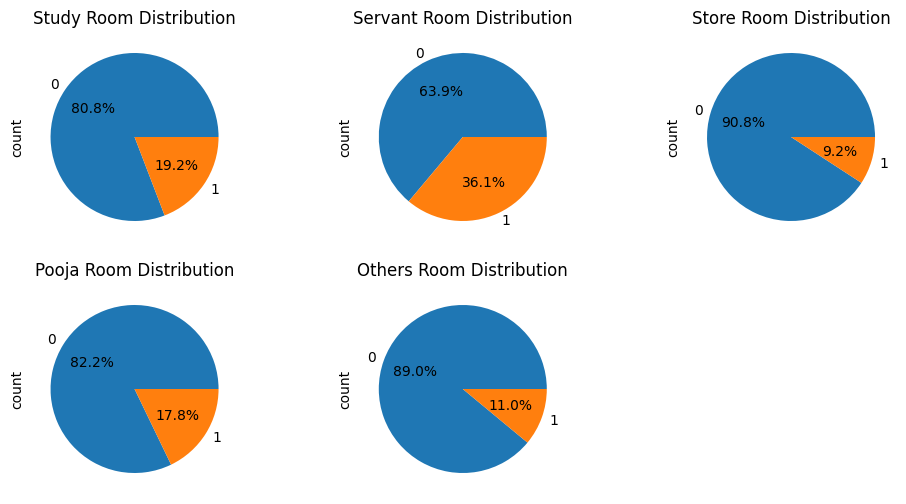

In [149]:
plt.figure(figsize=(12, 6))
plt.subplot(2,3,1)
df['study room'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Study Room Distribution')
plt.subplot(2,3,2)
df['servant room'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Servant Room Distribution')
plt.subplot(2,3,3)
df['store room'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Store Room Distribution')
plt.subplot(2,3,4)
df['pooja room'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Pooja Room Distribution')
plt.subplot(2,3,5)
df['others'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Others Room Distribution')

# furnishing_type

In [151]:
df['furnishing_type'].isnull().sum()

np.int64(0)

In [152]:
df['furnishing_type'].value_counts()

furnishing_type
0    2411
1    1059
2     207
Name: count, dtype: int64

<Axes: ylabel='count'>

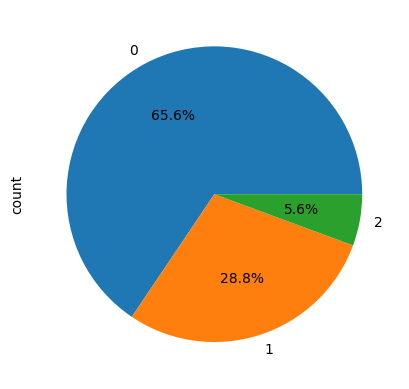

In [153]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')

# luxary score 

In [155]:
df['luxury_score'].isnull().sum()

np.int64(0)

<Axes: xlabel='luxury_score', ylabel='Count'>

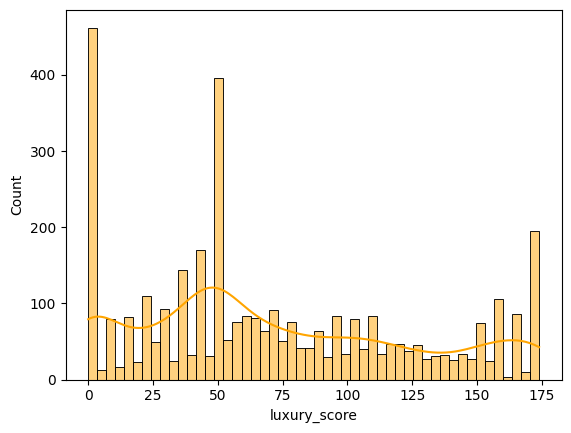

In [156]:
sns.histplot(df['luxury_score'], kde=True, bins=50, color='orange')

<Axes: ylabel='luxury_score'>

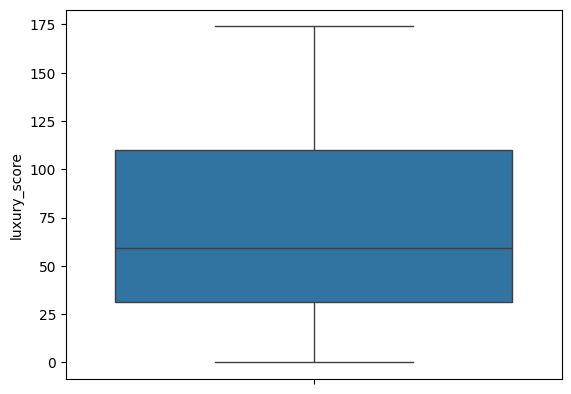

In [157]:
sns.boxplot(df['luxury_score'])